# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# Loading Data

In [36]:
amazon_data = pd.read_csv('amazon_reviews.csv')
amazon_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Data Preparation

In [37]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [38]:
amazon_data['date'] = pd.to_datetime(amazon_data['date'])

C:\Users\Kartik Borkar\AppData\Local\Temp\ipykernel_8284\2758757919.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_data['date'] = pd.to_datetime(amazon_data['date'])


In [39]:
amazon_data.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            object
feedback                     int64
dtype: object

In [47]:
amazon_data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
length              1
dtype: int64

In [55]:
amazon_data.describe()

,rating,date,feedback,length
count,3150.000000,3150,3150.000000,3149.000000
mean,4.463175,2018-07-24 02:39:05.142857472,0.918413,132.090187
min,1.000000,2018-05-16 00:00:00,0.000000,1.000000
25%,4.000000,2018-07-28 00:00:00,1.000000,30.000000
50%,5.000000,2018-07-30 00:00:00,1.000000,74.000000
75%,5.000000,2018-07-30 00:00:00,1.000000,165.000000
max,5.000000,2018-07-31 00:00:00,1.000000,2851.000000
std,1.068506,NaN,0.273778,182.114569


# Feature Understanding

<Axes: xlabel='rating', ylabel='count'>

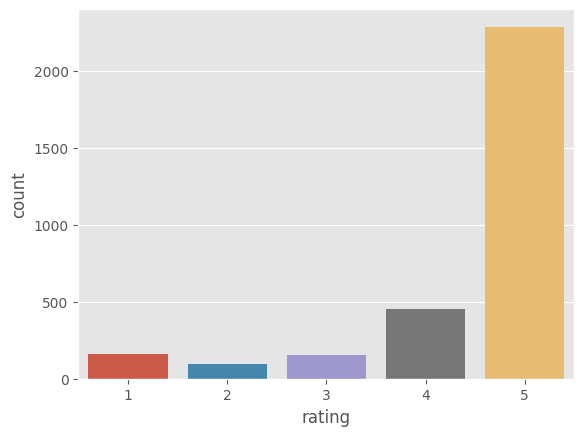

In [56]:
sns.countplot(x = amazon_data['rating'])

In [57]:
amazon_data['verified_reviews'].size

3150

In [58]:
amazon_data['length'] = amazon_data['verified_reviews'].str.len()
amazon_data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13.0
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9.0
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195.0
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172.0
4,5,2018-07-31,Charcoal Fabric,Music,1,5.0


### Ploting a Histogram

Text(0, 0.5, 'Count')

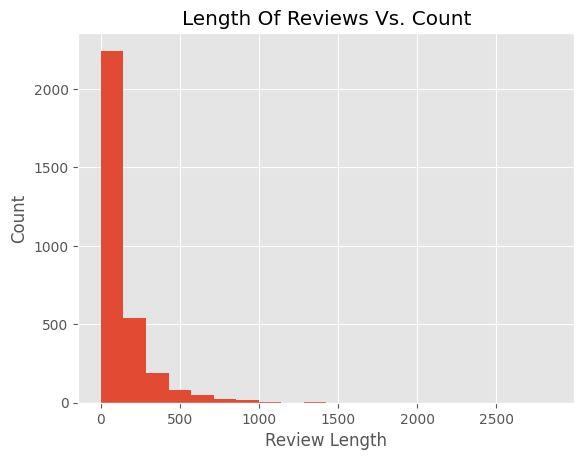

In [63]:
plot1 =amazon_data['length'].plot(bins = 20, kind = 'hist', title = 'Length Of Reviews Vs. Count')
plot1.set_xlabel('Review Length')
plot1.set_ylabel('Count')

In [64]:
amazon_data.describe()

,rating,date,feedback,length
count,3150.000000,3150,3150.000000,3149.000000
mean,4.463175,2018-07-24 02:39:05.142857472,0.918413,132.090187
min,1.000000,2018-05-16 00:00:00,0.000000,1.000000
25%,4.000000,2018-07-28 00:00:00,1.000000,30.000000
50%,5.000000,2018-07-30 00:00:00,1.000000,74.000000
75%,5.000000,2018-07-30 00:00:00,1.000000,165.000000
max,5.000000,2018-07-31 00:00:00,1.000000,2851.000000
std,1.068506,NaN,0.273778,182.114569


<Axes: xlabel='feedback', ylabel='count'>

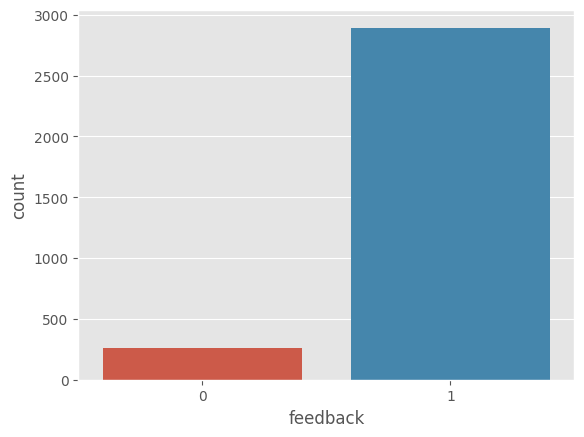

In [67]:
sns.countplot( x = amazon_data['feedback'])

# Plot WordCloud

In [68]:
pos_rev = amazon_data[ amazon_data['feedback'] == 1]
pos_rev

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13.0
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9.0
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195.0
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172.0
4,5,2018-07-31,Charcoal Fabric,Music,1,5.0
...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50.0
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135.0
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441.0
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380.0


In [69]:
pos_rev_list = pos_rev['verified_reviews'].tolist()
pos_rev_sentence = "".join(pos_rev_list)
pos_rev_sentence

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

In [70]:
neg_rev = amazon_data[ amazon_data['feedback'] == 0]
neg_rev

,rating,date,variation,verified_reviews,feedback,length
46,2,2018-07-30,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163.0
111,2,2018-07-30,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53.0
141,1,2018-07-30,Charcoal Fabric,Not much features.,0,18.0
162,1,2018-07-30,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87.0
176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0,20.0
...,...,...,...,...,...,...
3047,1,2018-07-30,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120.0
3048,1,2018-07-30,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37.0
3067,2,2018-07-30,Black Dot,The only negative we have on this product is t...,0,240.0
3091,1,2018-07-30,Black Dot,I didn’t order it,0,17.0


In [78]:
neg_rev_list = neg_rev['verified_reviews'].tolist()
neg_rev_sentence = "".join(str(neg_rev_list))
neg_rev_sentence

'["It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals.", \'Sound is terrible if u want good music too get a bose\', \'Not much features.\', "Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working?", \'Sad joke. Worthless.\', \'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.\', "It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things", "I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'

In [80]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 152.3 kB/s eta 0:00:00


In [81]:
from wordcloud import WordCloud

## WordCloud for positive reviews

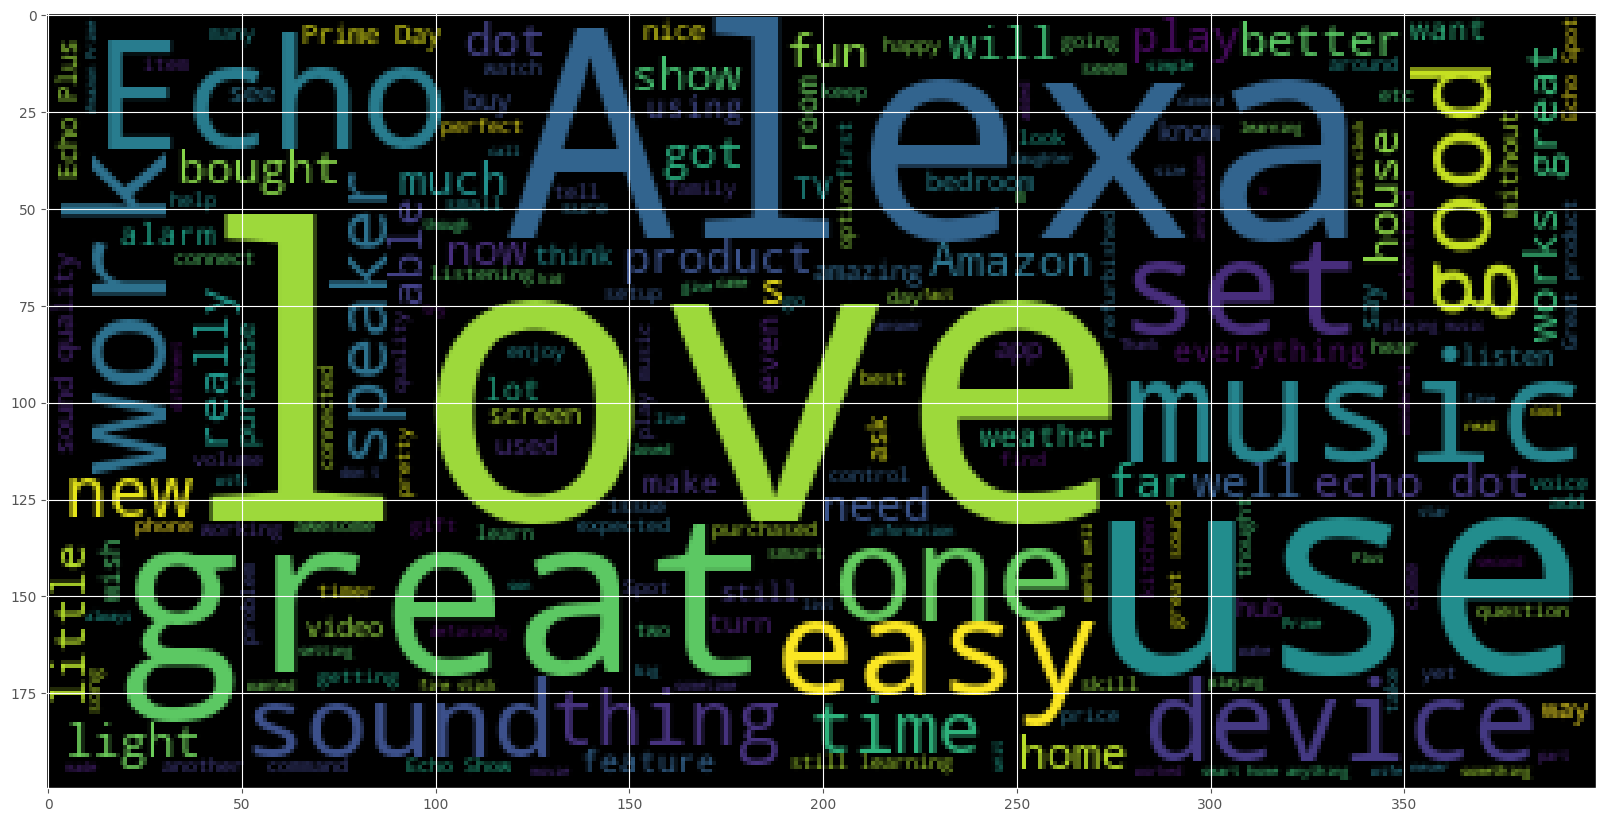

In [82]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(pos_rev_sentence))

### WordCloud for negative reviews

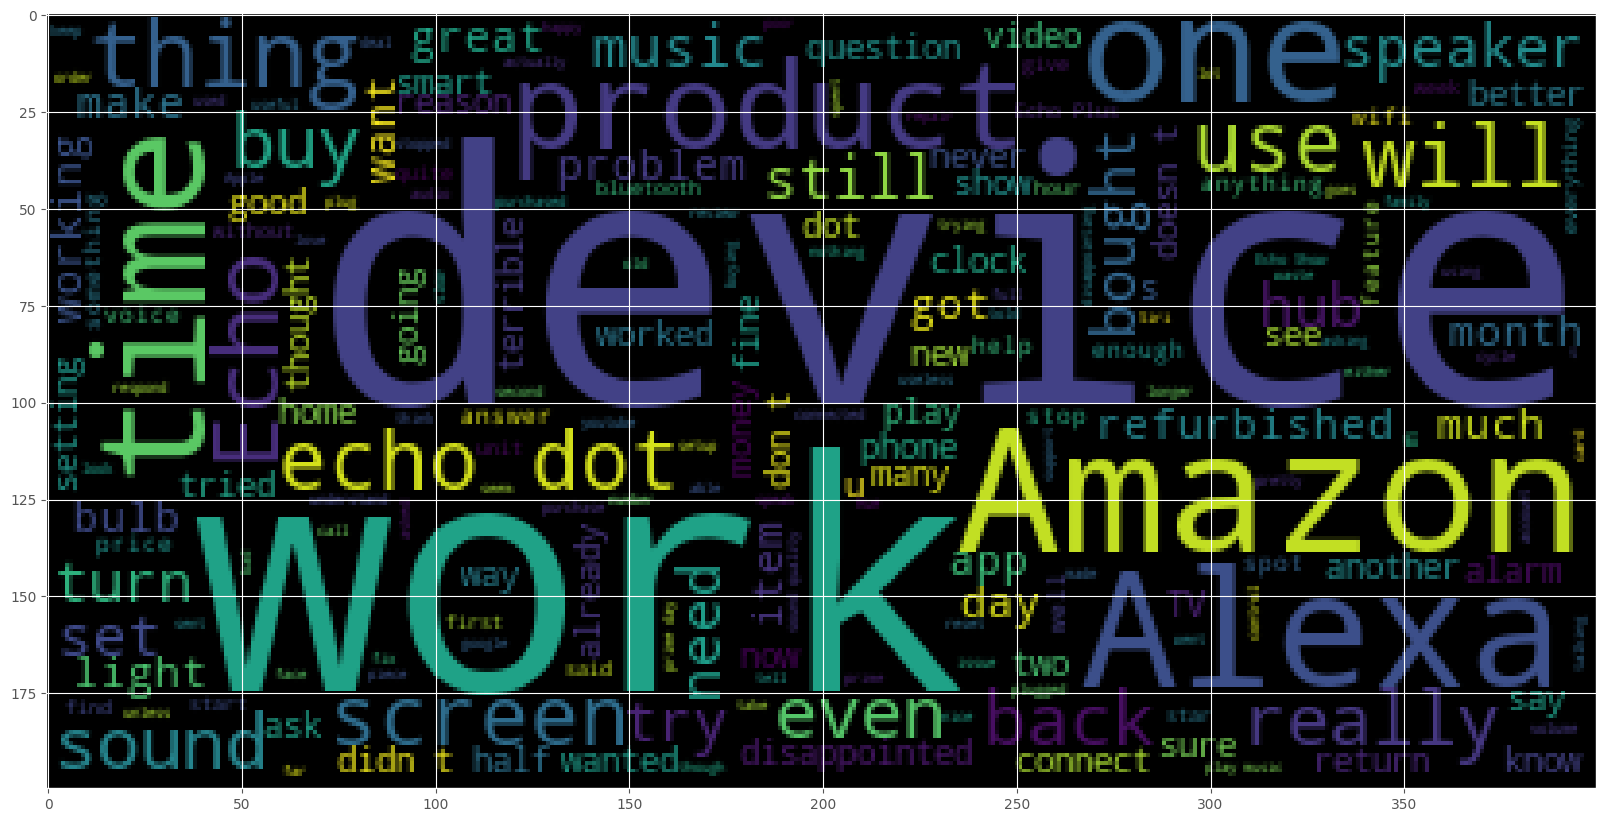

In [83]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(neg_rev_sentence))

In [85]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 582.0 kB/s eta 0:00:00
     ------------------------------------ 268.0/268.0 kB 917.1 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 799.2 kB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 1.4 MB/s eta 0:00:00


In [86]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
string.punctuation

[nltk_data] Downloading package stopwords to C:\Users\Kartik
[nltk_data]     Borkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Data Cleaning Function

In [91]:
def message_cleaning(message):
    text_punc_removed = [char for char in str(message) if char not in string.punctuation]
    text_punc_removed_join = "".join(text_punc_removed)
    text_cleaned = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return text_cleaned

In [92]:
review_df_clean = amazon_data['verified_reviews'].apply(message_cleaning) 

In [93]:
# shows original review
print(amazon_data['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [94]:
# shows cleane review
print(review_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [97]:
!pip install scikit_learn

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
X = vectorizer.fit_transform(amazon_data['verified_reviews'].values.astype('U'))

In [105]:
vectorizer.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

In [120]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
X.shape

(3150, 5212)

In [109]:
array_df = pd.DataFrame(X.toarray())
array_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,5112,5113,5114,5115,5116,5117,5118,5119,5120,5121,5122,5123,5124,5125,5126,5127,5128,5129,5130,5131,5132,5133,5134,5135,5136,5137,5138,5139,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149,5150,5151,5152,5153,5154,5155,5156,5157,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168,5169,5170,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
3145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
y = amazon_data['feedback']

In [111]:
y.shape

(3150,)

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [113]:
from sklearn.naive_bayes import MultinomialNB
NBclassifier = MultinomialNB()
NBclassifier.fit(X_train, y_train)

MultinomialNB()

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

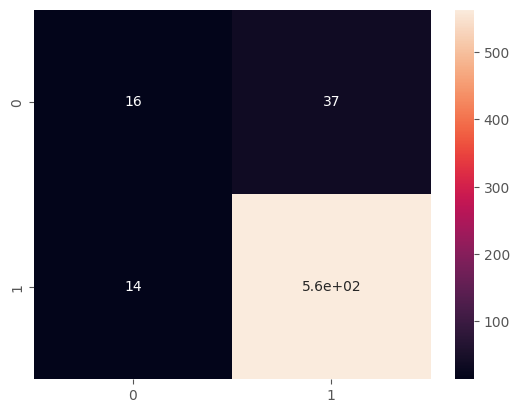

In [115]:
y_predict_test = NBclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [116]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.53      0.30      0.39        53
           1       0.94      0.98      0.96       577

    accuracy                           0.92       630
   macro avg       0.74      0.64      0.67       630
weighted avg       0.90      0.92      0.91       630



              precision    recall  f1-score   support

           0       0.86      0.34      0.49        53
           1       0.94      0.99      0.97       577

    accuracy                           0.94       630
   macro avg       0.90      0.67      0.73       630
weighted avg       0.94      0.94      0.93       630



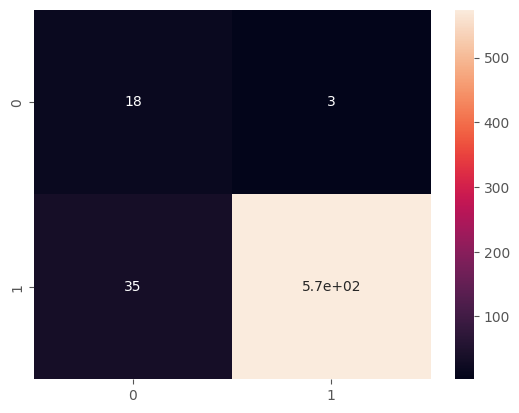

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.13      0.22        53
           1       0.93      0.99      0.96       577

    accuracy                           0.92       630
   macro avg       0.78      0.56      0.59       630
weighted avg       0.90      0.92      0.90       630



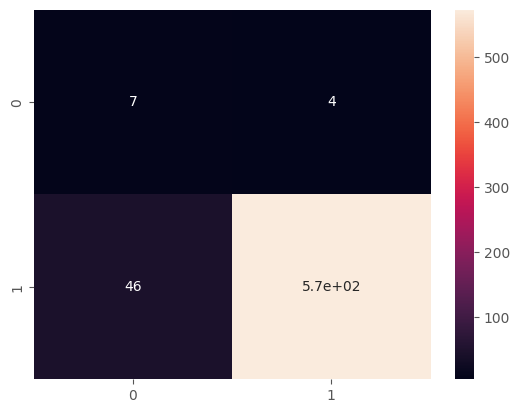

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))